## 1. 라이브러리 및 데이터 불러오기

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [272]:
predict=pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra.xlsx")
extra=pd.read_excel("extra_score.xlsx")
# temp=pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra1.xlsx")

## 2. 감정분류값 전처리

In [273]:
# 부정값(0) -> 음수화(-1)
predict['predicted'].loc[predict['predicted'] == 0] = -1

C:\Users\hanah\AppData\Local\Temp\ipykernel_10180\2274638855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['predicted'].loc[predict['predicted'] == 0] = -1


In [274]:
# 감정분류에 따른 E/S/G 개별점수화
predict['Escore'] = predict['Ecnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict['Sscore'] = predict['Scnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict['Gscore'] = predict['Gcnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict.fillna(0, inplace=True)
predict.head()

,id,year,doc,content,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
0,1,2020,원수가 다니겠다고 하면 도시락 싸 들고 환영할 회사 중소기업의 흔한 사건사고 단점 ...,장점 꼰대 문화가 별로 없고 변화와 발전 추구함 투자를 많이 받고 있기 때문에 사...,0,4,3,-1,-0.0,-0.571429,-0.428571
1,1,2020,앞으로도 더 성장 할 가능성이 높은 회사,장점 직원들에게 많은 기회를 준다 한가지만 보지 않고 다양한 분야에서 어떻게 인재가...,0,0,2,1,0.0,0.000000,1.000000
2,1,2020,블리츠웨이 300 꿈의 장난감 볼트론 피규어로 매출 100억원 기대,피규어 전문제작사 블리츠웨이가 출시 예정인 볼트론이 사전예약 첫 날 자체 예약 최고...,0,0,0,1,0.0,0.000000,0.000000
3,1,2020,배용준도 투자한 블리츠웨이 코스닥 예비심사 통과 정밀 피규어 최초 상장 기대,피규어 개발 및 제작 전문 기업 블리츠웨이가 코스닥 상장을 위한 예비 심사를 통과했...,0,0,0,1,0.0,0.000000,0.000000
4,1,2020,대신밸런스제9호스팩 블리츠웨이와 합병 승인 12월 코스닥 상장,대신밸런스제9호스팩은 피규어 개발 제작 전문 기업 블리츠웨이 와 합병상장을 위한 ...,0,0,0,1,0.0,0.000000,0.000000


In [275]:
# 기업, 년도별 점수 합산
predict = predict.groupby(['id','year']).sum().reset_index()
predict.describe()

C:\Users\hanah\AppData\Local\Temp\ipykernel_10180\1933808086.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  predict = predict.groupby(['id','year']).sum().reset_index()


,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,682.959703,2020.501565,1.540689,18.660407,27.805947,3.774257,0.367157,0.949459,-0.333439
std,398.661749,0.500095,6.134461,14.337438,16.535838,13.512345,1.176370,3.615770,6.955879
min,1.000000,2020.000000,0.000000,0.000000,0.000000,-27.000000,-3.437500,-11.366667,-22.833333
25%,334.750000,2020.000000,0.000000,7.000000,13.000000,-4.000000,0.000000,-1.000000,-4.370833
50%,683.500000,2021.000000,0.000000,17.000000,32.500000,1.000000,0.000000,0.412500,0.000000
75%,1025.000000,2021.000000,0.000000,27.250000,40.000000,9.000000,0.000000,2.433333,3.127976
max,1382.000000,2021.000000,94.000000,126.000000,121.000000,111.000000,14.199242,21.880952,35.650000


## 3. 감정스코어 이외 가감점 반영

In [276]:
predict_extra = pd.merge(predict, extra, on=['id','year'], how='left')
predict_extra.fillna(0, inplace=True)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,0.0,0.0,0.0,0.0,0.0
1,1,2021,0,12,12,2,0.0,-2.000000,-1.000000,-1.0,0.0,0.0,0.0,0.0
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.0,0.0,0.0,0.0,0.0
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,0.0,0.0,0.0,0.0,0.0
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,0.0,0.0,0.0,0.0,0.0
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,0.0,0.0,0.0,0.0,0.0
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.0,0.0,0.0,0.0,0.0


In [277]:
predict_extra['Escore'] = predict_extra['Escore'] + predict_extra['hazard_pdt'] + predict_extra['green_pdt'] +  predict_extra['patent']
predict_extra['Gscore'] = predict_extra['Gscore'] + predict_extra['major_50'] +  predict_extra['adt_bad']

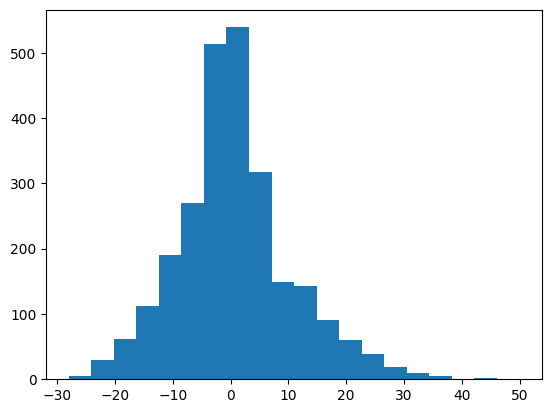

In [278]:
# ESG 통합 점수화
predict_extra['TotalScore'] = predict_extra['Escore'] + predict_extra['Sscore'] + predict_extra['Gscore']
plt.hist(predict_extra['TotalScore'], bins = 20);

## 4. 데이터셋 스케일링

In [279]:
scaler = StandardScaler()
predict_extra['TotalScore2'] = scaler.fit_transform(predict_extra[['TotalScore']])
predict_extra.drop(['major_50', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,TotalScore,TotalScore2
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,-1.000000e+00,-0.178508
1,1,2021,0,12,12,2,0.0,-2.000000,-2.000000,-4.000000e+00,-0.481675
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.000000e+00,-0.077452
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,2.000000e+00,0.124659
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,1.100000e+01,1.034160
...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,-1.000000e+00,-0.178508
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,3.000000e+00,0.225715
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,-5.551115e-17,-0.077452
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.000000e+00,-0.077452


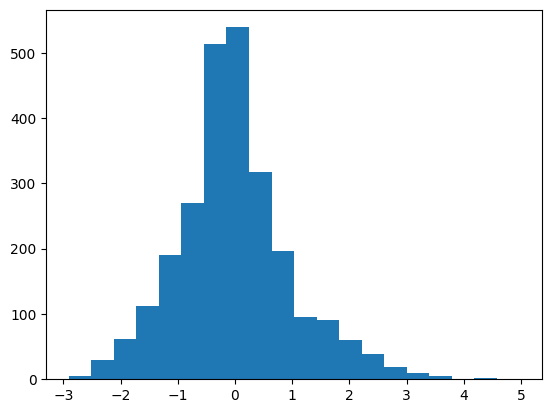

In [280]:
plt.hist(predict_extra['TotalScore2'], bins = 20);

In [282]:
predict_extra.to_excel('predict_extra.xlsx')